<a href="https://colab.research.google.com/github/gol-d-inesh/Rossmann_Sales_Prediction_ML_Project/blob/main/Rossmann_Sales_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name -** **Retail Sales Prediction**

Project type - EDA Regression

Contribution - Individual

Team member - Dinesh

# Problem Description

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# GitHub
https://github.com/gol-d-inesh/Ross_man


# Dataset
Rossmann stores data - https://drive.google.com/file/d/14a-zbltgirbuWh8tGvwfm7Xoo5pAINtV/view?usp=drive_link

Store - https://drive.google.com/file/d/1MJ8i78_IDHDYec3s2xdbI9lkAvcyPczv/view?usp=drive_link

#**Problem Statement**
Rossmann operates over 3,000 drug stores in 7 European Countries.Currently,Rossmann store managers are tasked with predicting their daily sales for upto six weeks in advance.Store sales are influenced by many factors,including promotions,competition,school and state holidays,seasonality,and loclity.With thousands of individual managers predicting sales based on their unique circumstance the accuracy of result can be quite varied.You are provided with historical sales data for 1,115 Rossmann stores.The task is to forecast the 'Sales' column for the test set.Note that some stores in the dataset were temporarily closed for refurbishment

#**General Guidelines**



1.  Well-structured, formatted, and commented code is required.
2.  Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go without a single
    error logged. ]
3.  Each and every logic should have proper comments.

4.  You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
* Why did you pick the specific chart?
* What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
5.  You have to create at least 15 logical & meaningful charts having important insights.

Hints : - Do the Vizualization in a structured way while following "UBM" Rule

    U - Univariate Analysis
    B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)
    M - Multivariate Analysis

6.  You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
* Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* Cross- Validation & Hyperparameter Tuning
* Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
* Explain each evaluation metric's indication towards business and the business impact pf the ML model used.





#**Let's Begin !**

# **1. Know your data**

**Import Libraries**

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

**Dataset loading**

In [4]:
#Mouting Google drive with colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
ross_store=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
store=pd.read_csv('/content/drive/MyDrive/store.csv')

**Dataset first view**

In [6]:
ross_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**Rows and Columns count**

In [8]:
#Rossmann Dataset
print(f'Shape of dataset is :{ross_store.shape}')
print(f'Our dataset contains {ross_store.shape[0]} Rows')
print(f'Our dataset contains {ross_store.shape[1]} Columns')

Shape of dataset is :(1017209, 9)
Our dataset contains 1017209 Rows
Our dataset contains 9 Columns


In [9]:
#Store Dataset
print(f'Shape of dataset is :{store.shape}')
print(f'Our dataset contains {store.shape[0]} Rows')
print(f'Our dataset contains {store.shape[1]} Columns')

Shape of dataset is :(1115, 10)
Our dataset contains 1115 Rows
Our dataset contains 10 Columns


**Dataset Information**

In [10]:
ross_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


**Points to be noted:**

* Ross store dataset does not contain any null value
* Date and StateHoliday dtype is object

In [11]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Points to be noted**

* There are many null values present in this dataset

**Duplicate values**

In [12]:
print("Number of duplicate rows in Rossmann Store Dataset :",ross_store.duplicated().sum())
print("Number of duplicate rows in Store Dataset :",store.duplicated().sum())

Number of duplicate rows in Rossmann Store Dataset : 0
Number of duplicate rows in Store Dataset : 0


**Missing Values/Null Values**

In [13]:
ross_store.isnull().sum().sort_values(ascending=False)

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


* Rossmann Store Dataset doesn't contains any null values



In [14]:
print("Null values in Store Dataset")
print(store.isnull().sum())
print("")
print("Percentage of null values")
per = (store.isnull().mean()*100).round().astype(int).astype(str)+'%'
print(per)

Null values in Store Dataset
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Percentage of null values
Store                         0%
StoreType                     0%
Assortment                    0%
CompetitionDistance           0%
CompetitionOpenSinceMonth    32%
CompetitionOpenSinceYear     32%
Promo2                        0%
Promo2SinceWeek              49%
Promo2SinceYear              49%
PromoInterval                49%
dtype: object


* There are too many columns which contain null values of high percentage.

In [15]:
#describe the dataset
pd.set_option('display.float_format', lambda x: '%.0f' % x)
percentiles = [0.01, 0.25, 0.5, 0.75, 0.95,0.99]
ross_store.describe(percentiles=percentiles)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209,1017209,1017209,1017209,1017209,1017209,1017209
mean,558,4,5774,633,1,0,0
std,322,2,3850,464,0,0,0
min,1,1,0,0,0,0,0
1%,11,1,0,0,0,0,0
25%,280,2,3727,405,1,0,0
50%,558,4,5744,609,1,0,0
75%,838,6,7856,837,1,1,0
95%,1060,7,12137,1362,1,1,1
99%,1104,7,17160,2267,1,1,1


* Sales and Customers columns contain outliers.





In [16]:
store.describe(percentiles=percentiles)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115,1112,761,761,1115,571,571
mean,558,5405,7,2009,1,24,2012
std,322,7663,3,6,1,14,2
min,1,20,1,1900,0,1,2009
1%,12,50,1,1994,0,1,2009
25%,280,718,4,2006,0,13,2011
50%,558,2325,8,2010,1,22,2012
75%,836,6882,10,2013,1,37,2013
95%,1059,20145,12,2014,1,45,2014
99%,1104,35145,12,2015,1,48,2015


* CompetitionDistance column contain outlier.

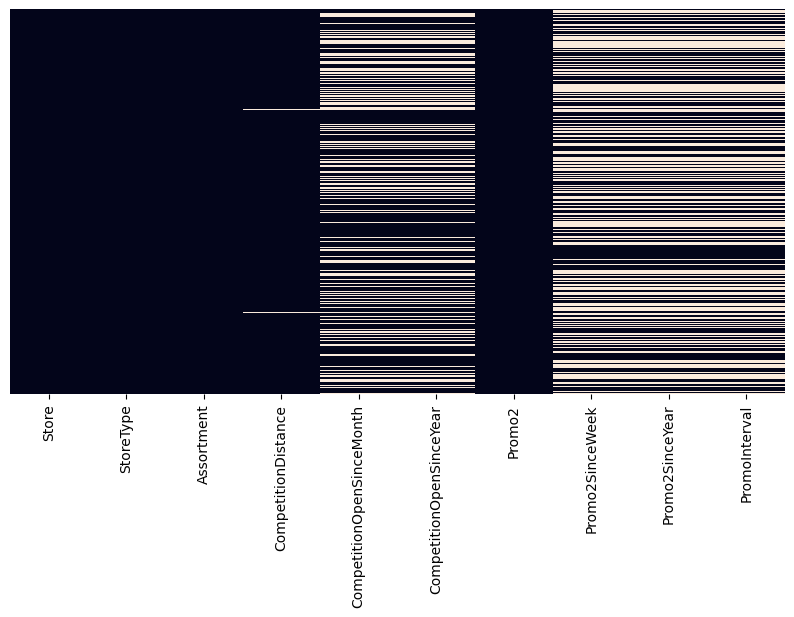

In [17]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(store.isnull(),cbar=False,yticklabels=False)
plt.show()

* Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth,CompetitionOpenSinceYear contains too many null values

**What did you know about your dataset?**

* One dataset is Rossmann Stores which contains 1017209 rows and 9 columns.The dataset doesn't contain any null or duplicated values.It gives us inforamation about the type of store,sales in each store by what date through how many number of customers.Also whether the sale was affected by closure of shop on weekends or or any kind of stateholiday or schoolholiday.It also gives on how sales was affected on applying promo.
* The other dataset is store data which has 1115 Rows and 10 Columns.This dataset contains too many null values in different columns.which needs to be taken care in upcoming steps.It provides information like type of store and what is assostment level used in store,how far away is competitor from store,since how long is competitor there in the market and how often is promo applied on the store.

# **2. Understanding Your Variables**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Store - a unique Id that represents store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - whether the store was open or not: 0 = closed, 1 = open

StateHoliday - state holiday or not

SchoolHoliday - SchoolHoliday or not

StoreType - what is the type of the store: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSinc[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - store running consecutive promotion or not

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.



**Check Unique Values for each variable.**

In [18]:
#Rossmann store Dataset
print('Unique Values')
unique_vals =ross_store.apply(lambda col: col.unique())
print(unique_vals)
print('_'*70,'\n')
print('Unique Values Count')
print(ross_store.nunique())

Unique Values
Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object
______________________________________________________________________ 

Unique Values Count
Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64


In [19]:
# seems like there are 2 0 values 1 with "0" and 1 with " 0"
ross_store["StateHoliday"].value_counts()

,count
StateHoliday,
0,855087
0,131072
a,20260
b,6690
c,4100


In [20]:
#Store Dataset
unique_vals =store.apply(lambda col: col.unique())
print(unique_vals)
print('_'*80,'\n')
print('Unique Values Count')
print(store.nunique())

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object
________________________________________________________________________________ 

Unique Values Count
Store                        1115
StoreType                       4
Assortment               

# **3. Data Wrangling**

In [21]:
#dropping columns from store dataset which contains too many null values
store.drop(columns=['PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'],axis=1,inplace=True)

#filling null values in competitiondistance column with median
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(),inplace=True)

#merging both the dataset
data=ross_store.merge(store,on='Store',how='left')

In [22]:
#first look of the merged dataset
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910,0


In [23]:
#shape of the dataset
data.shape

(1017209, 13)

In [24]:
# creating year,month,week_num column from Date Column
data['Date']=pd.to_datetime(data['Date'])
data['year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['week_num'] = data['Date'].dt.isocalendar().week
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  object        
 10  Assortment           1017209 non-null  object        
 11  CompetitionDistance  1017209 non-null  float64       
 12  Promo2               1017209 non-null  int64         
 1

In [25]:
#dropping date column from data
data.drop(columns='Date',axis=1,inplace=True)

**Outlier Treatment**

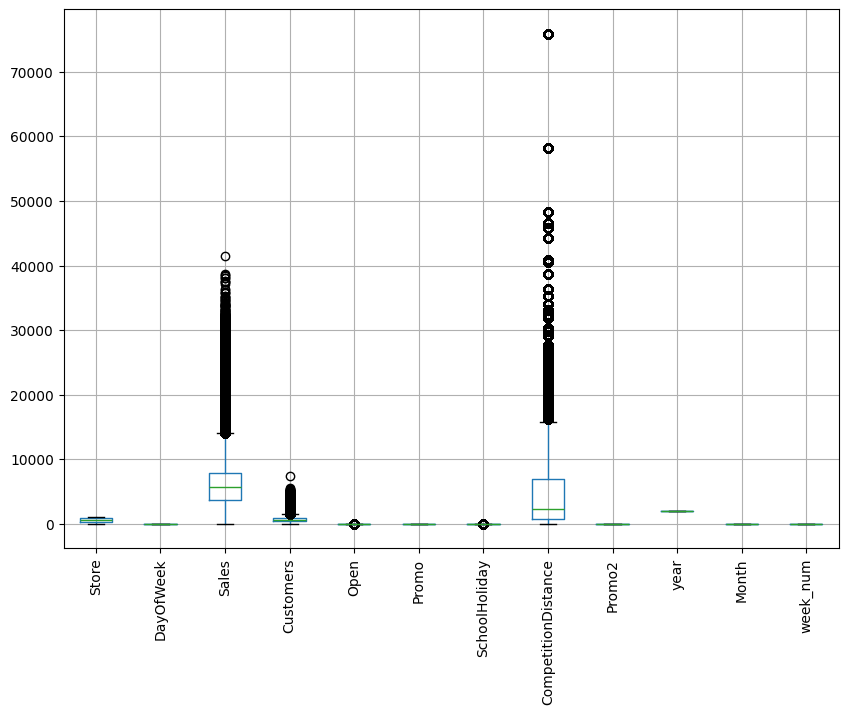

In [26]:
#Now let's deal with the outliers
plt.figure(figsize=(10,7))
data.boxplot()
plt.xticks(rotation='vertical')
plt.show()

*  Columns like **Sales,CompetitionDistance** and **customers** contains **Outliers** but **CompetitionDistance** contains maximum



In [27]:
#find out 90,95,99 percentile values of Competition distance column
percentiles=[0.90,0.95,0.99]
data['CompetitionDistance'].describe(percentiles=percentiles)

,CompetitionDistance
count,1017209
mean,5422
std,7707
min,20
50%,2325
90%,15710
95%,20390
99%,36410
max,75860


* From this we can see that 99% value is around 36K and maximum value is around 75K,so let's consider only value around 95%



In [28]:
#find out 90,95,99 percentile values of Sales Column
data['Sales'].describe(percentiles=percentiles)

,Sales
count,1017209
mean,5774
std,3850
min,0
50%,5744
90%,10288
95%,12137
99%,17160
max,41551


* In sales Feature also outliers is there and let's consider only those value around 95%



In [29]:
#find out 90,95,99 percentile values of Customers Column
data['Customers'].describe(percentiles=percentiles)

,Customers
count,1017209
mean,633
std,464
min,0
50%,609
90%,1116
95%,1362
99%,2267
max,7388


* Here also let's consider value around 1400 that is around 95%



In [30]:
#let's first create copy of our dataset
df=data.copy()
#shape before outlier treatment
df.shape

(1017209, 15)

In [31]:
#let's consider all the values in which competition distance and sales,Customers values are around 95% percentile
df=df[df['CompetitionDistance']<20000]
df=df[df['Customers']<1400]
df=df[df['Sales']<13000].reset_index(drop=True)

In [32]:
#shape of the data after the outlier treatment
df.shape

(908510, 15)

In [33]:
#let's convert stateholiday into state_holiday yes(1) or no(0)
df['state_holiday'] = data['StateHoliday'].apply(lambda x: 1 if x in ['a', 'b', 'c'] else 0)

In [34]:
#drop stateholiday column from the dataset
df.drop(columns='StateHoliday',axis=1,inplace=True)

## **What all manipulations have you done and insights you found?**
* First of all I dropped all the columns which include 'PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth' from the store dataset as these contain too many null values.
* After that I filled null values of CompetitionDistance column of store dataset with median values.
* Then I merged both the datasets.
* Then I created Year, Month, Week_num columns from the Date column of the dataset and I droped the Date column.
* Then I visualized the outliers of the data using boxplot and it was found that columns like CompetitionDistance, Sales, Customer have maximum outliers.
* Then I considered around 95% percentile values in order to get rid of some outliers.
* Then I converted the StateHoliday column into another column state_holiday in which I considered 0 as No holiday and 1 as Holiday, and I also dropped the StateHoliday column from the dataset.

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Chart - 1: Sales Vs DayOfWeek**

It was mentioned that some of the shops were closed so sales during that period was zero,so we will create a dataframe that filter out those days

In [35]:
#creating a dataset where ['Sales']!=0
df1=df[df['Sales']!=0]

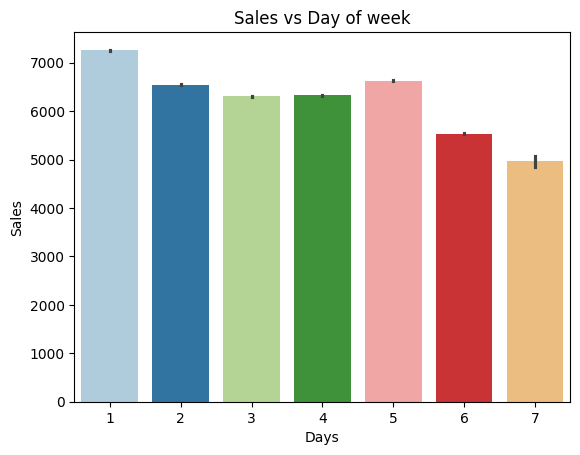

In [36]:
#Chart 1 Sales Per Day
#Bivariate Analysis
ax=sns.barplot(x=df1['DayOfWeek'],y=df1['Sales'], palette='Paired')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Sales vs Day of week')
plt.show()

1. Why did you pick the specific chart?  
I have used seaborn barplot to find out the sales over week days to visualize the comparison

2. What is/are the insight(s) found from the chart?  
It has been find out that Day-1 i,e Monday has got maximum Sales and Day-7 i,e Sunday has got least

3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.  
From the barplot it can been seen that after day-1 there has been decline in the sales.sufficient measures should be taken to look into this matter

**Chart - 2: Sales vs Promo**

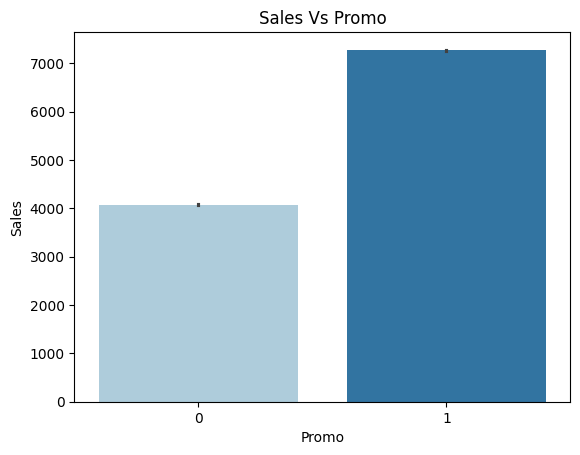

In [37]:
# Chart - 2 Sales Vs Promo
#Bivariate Analysis
ax=sns.barplot(x=df['Promo'],y=df['Sales'],palette='Paired')
plt.title('Sales Vs Promo')
plt.show()

1. Why did you pick the specific chart?  
I have used barplot to find out the relationship between sales and promo

2. What is/are the insight(s) found from the chart?  
It has been find out that the sales get's almost double when a promo is running

3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.  
Business should try to run more promo in order to get more sales and particularly when on those days where sales are minimum.

**Chart - 3: Sales in Different Months**

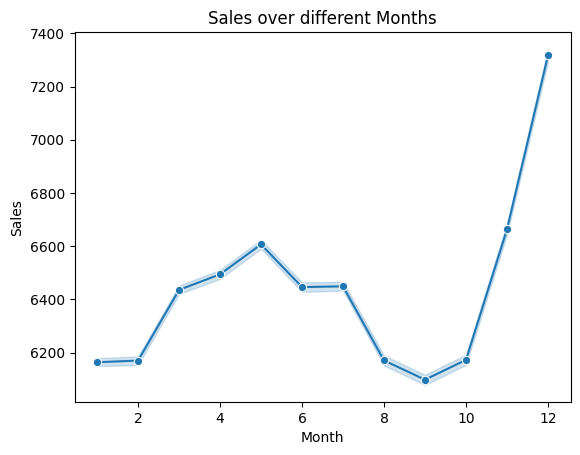

In [38]:
# Chart - Sales Over Months
#Bivariate Analysis
ax=sns.lineplot(x=df1['Month'],y=df1['Sales'],marker='o')
plt.title('Sales over different Months')
plt.show()

1. Why did you pick the specific chart?  
I have Picked lineplot to show sales over month trend

2. What is/are the insight(s) found from the chart?  
It can been seen that after october there has a very large growth in sales that might be due to festival season.December shows maximum sales may be because of christmas and new year

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.  
From the plot it can be seen that sales has been dropped in the month of may so the management needs to focus on this and they can also run any promo to increase the sales

**Chart - 4: Sales in different Stores Over Different Years**

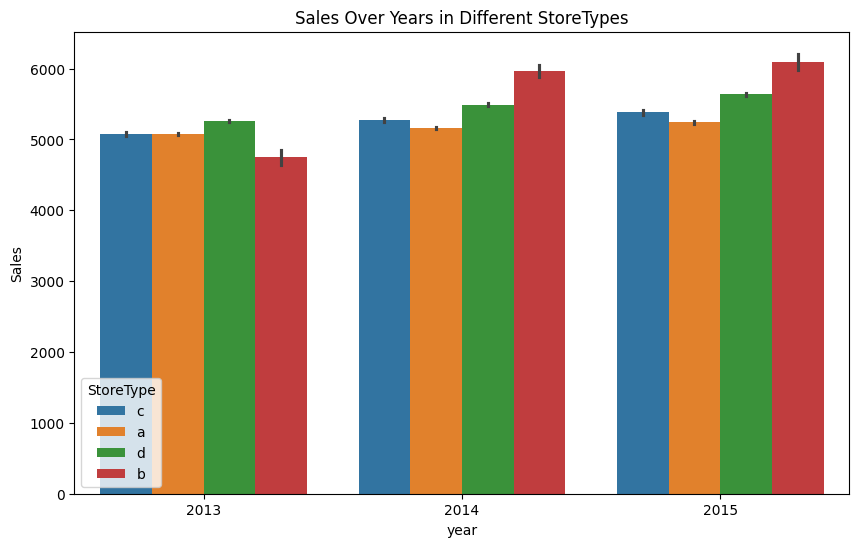

In [39]:
# Chart - 4 Sales Over Years in Different StoreTypes
#Multivariate Analysis
plt.figure(figsize=(10,6))
sns.barplot(x=df['year'],y=df['Sales'],hue=df['StoreType'])
plt.title('Sales Over Years in Different StoreTypes')
plt.show()

1. Why did you pick the specific chart?  
i have picked barplot to find out Sales over year in different Store types

2. What is/are the insight(s) found from the chart?  
It was find out that Store b sales has been inceased from 2013 to 2015 and in 2013 store d has maximum sales and in remaining years store b has maximum sales

3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.  
The graph shows that the sales in b store type has increased over all years but sales in other store types remained almost same.So, other store should also try to use same business tatics as of store b

**Chart - 5: Sales vs School Holiday**

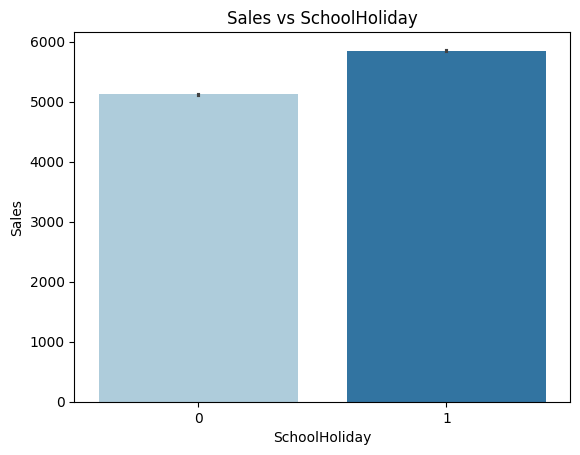

In [40]:
# Chart - 5 Sales vs SchoolHoliday
#Bivaraite Analysis
# avg sales for 0 and 1 being plotted in bar chart
ax=sns.barplot(x=df['SchoolHoliday'],y=df['Sales'], palette ="Paired")
plt.title('Sales vs SchoolHoliday')
plt.show()

1. Why did you pick the specific chart?  
i have picked barplot to find out the effect of SchoolHoliday on Sales

2. What is/are the insight(s) found from the chart?  
From the graph it can be seen that there is a very good sales when schoolholiday is there, also good sales can be seen when there is no school Holiday,so SchoolHoliday doesn't really affect the sales

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.  
Since there is very small difference in sales and sales are maximum during school holidays.So the management needs to consider this also to increase sales during schoolholiday

**Chart - 6: Sales vs StateHoliday**

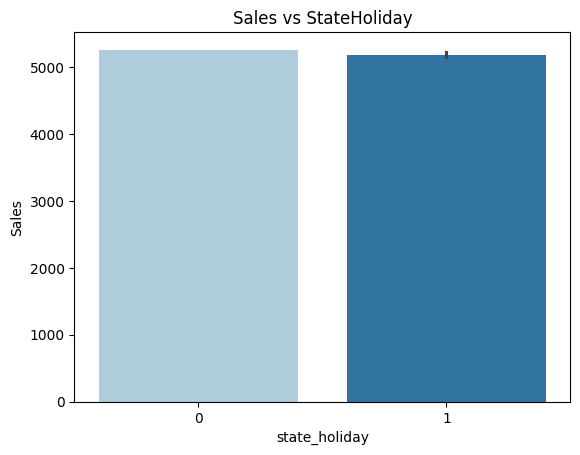

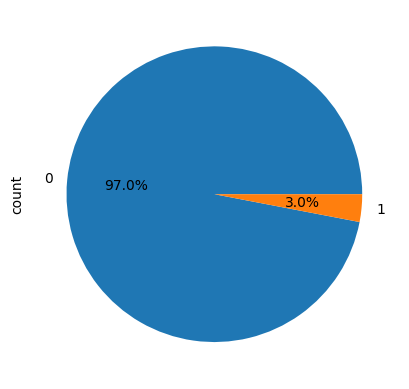

In [41]:
# Chart - sales vs StateHoliday
#Bivariate Analysis
#plotting barplot
# avg sales for 0 and 1 being plotted in bar chart
ax=sns.barplot(x=df['state_holiday'],y=df['Sales'], palette ="Paired")
plt.title('Sales vs StateHoliday')
plt.show()

#plotting pie chart
df['state_holiday'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

1. Why did you pick the specific chart?  
I have picked barplot and pie-chart to find out the effect of any type of state holiday on sales by how much

2. What is/are the insight(s) found from the chart?  
From the barplot it can be easily seen that it doesn't matter whether there is state holiday or not there is good amount of sales on both the occassions as the avg sales are almost same and from the pie chart it can be seen that only 3% of sales is effected by stateholiday.So overall sales doesn't depend on stateholiday

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.  
The stateholiday minorly effects sales which is negligible.

**Chart - 8: Sales vs Assostment Level**

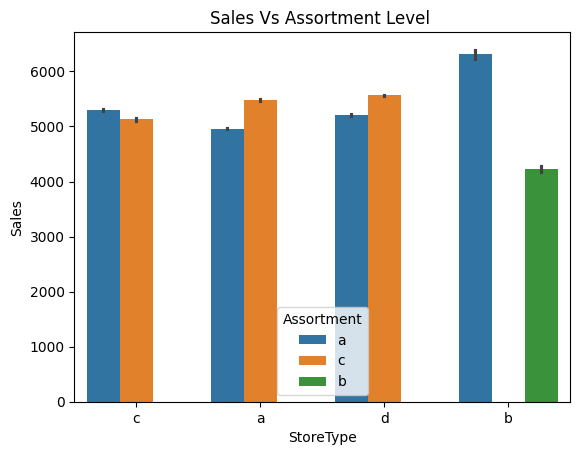

In [42]:
# Chart - Sales vs AssortmentLevel in all stores
#Multivaraite Analysis
ax=sns.barplot(x=df['StoreType'],y=df['Sales'],hue=df['Assortment'])
plt.title('Sales Vs Assortment Level ')
plt.show()

1. Why did you pick the specific chart?   
I have picked barplot to visualize the sales in different store types with different assortment levels

2. What is/are the insight(s) found from the chart?  
From the plot it can that in Store B only a and b assortment has been used and out of which assortment a got maximum sales. Also in remaining Store only a and c assortment level has been used and they got equal sales
3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.  
From the graph it can be seen there was no store where all type of assortment level were used so management could experiment should try to use all type of assortment levels

**Chart - 9: Sales Vs Customer**

Text(0.5, 1.0, 'Sales vs Customer')

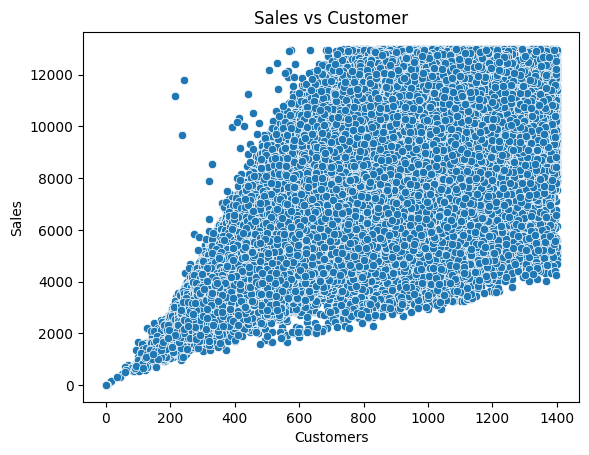

In [43]:
# Chart - 9 Relation between Sales and Customer
#Bivariate Analysis
sns.scatterplot(x=df['Customers'],y=df['Sales'])
plt.title('Sales vs Customer')

1. Why did you pick the specific chart?  
I have used scatter plot to find out the relationship between customers and sales

2. What is/are the insight(s) found from the chart?  
It was find out from the plot that the customers and sales are positively correlated to each other i,e more customer visits the store more will be sales. We have genuine customers making purchases

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.  
Management should always try to always focus to attract more and more customers in order to increase Sales. As the customers are coming and buying our products that means selection of products are right. We need to focus on getting more customers.

**Chart - 10: CompetitionDistance and Sales**

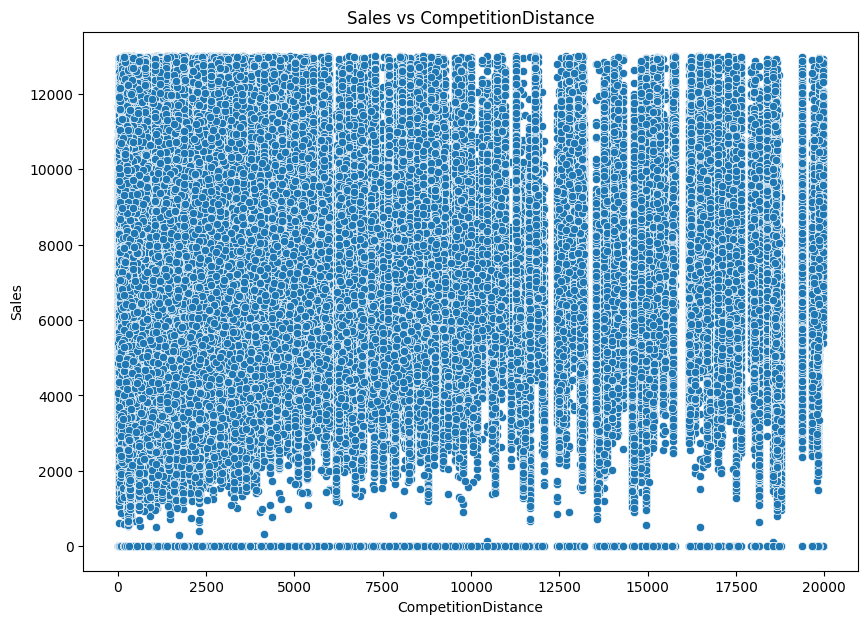

In [44]:
# Chart - 10 visualization code
#Bivariate Analysis
# CompetitionDistance and Sales
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['CompetitionDistance'],y=df['Sales'])
plt.title('Sales vs CompetitionDistance')
plt.show()

1. Why did you pick the specific chart?  
I have used scatter plot to find out the relationship between Sales and Competition Distance

2. What is/are the insight(s) found from the chart?  
No pattern or something can be seen as such between the plots

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.  
No relation can be seen in the plot.

**Chart - 11: Sales Vs Promo 2**

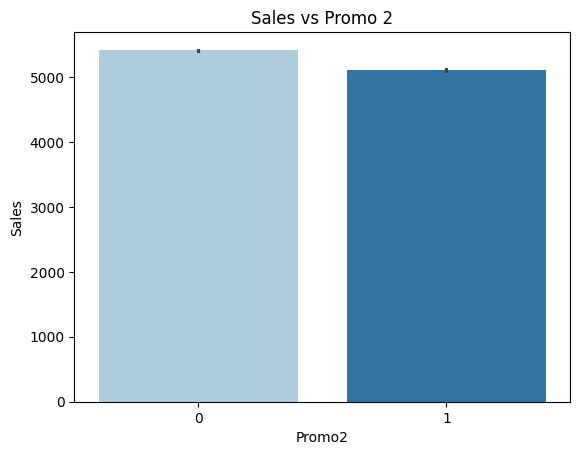

In [45]:
# Chart - 11 visualization code
#Bivariate Analysis
ax=sns.barplot(x=df['Promo2'],y=df['Sales'], palette ="Paired")
plt.title('Sales vs Promo 2')
plt.show()

1. Why did you pick the specific chart?  
I have used barplot to find out effect of promo 2 on sales

2. What is/are the insight(s) found from the chart?  
It can be seen from the graph that Running promo continously has not been that much effective towards increasing Sales

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.  
As running Promo Continously promo has not been that much effective towards sales so management either needs to drop this offer or to run it in more effective way

**Chart - 12: Sales distribution with Promo**

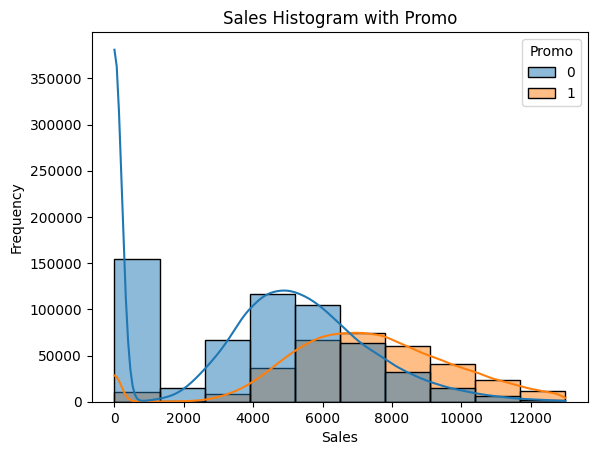

In [46]:
# Chart - 12 visualization code
sns.histplot(data=df, x='Sales', hue='Promo', bins=10, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Histogram with Promo')
plt.show()

1. Why did you pick the specific chart?  
Used Histogram with kde to show distribution of the data.

2. What is/are the insight(s) found from the chart?  
With Promo 1(promo applied) the sales for the store is generally higher then when promo is 0(promo not applied). Distribution of the dataset can also be seen from the plot.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.  
Proper usage of Promo can lead to more sales. The value created by this promo from a customer perception needs to be analysed and can used in other promos and marketing strategies/initiatives.

**Chart - 13: Customers distribution with Promo**

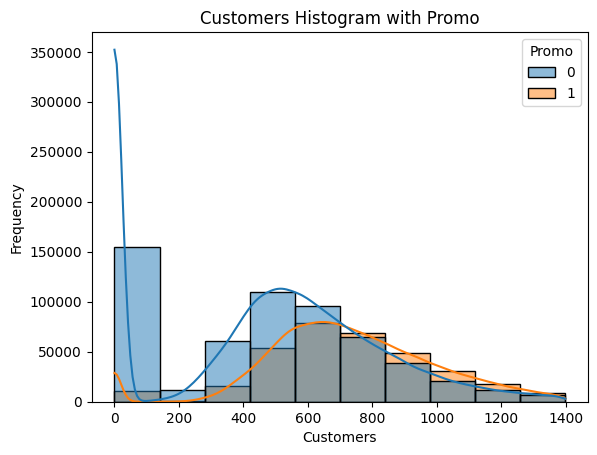

In [47]:
# Chart - 13 visualization code
sns.histplot(data=df, x='Customers', hue='Promo', bins=10, kde=True)
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.title('Customers Histogram with Promo')
plt.show()

1. Why did you pick the specific chart?  
Used Histogram with kde to show distribution of the data.

2. What is/are the insight(s) found from the chart?  
With Promo 1(promo applied) the customers for the store is generally higher then when promo is 0(promo not applied). Distribution of the dataset can also be seen from the plot.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.  
Proper usage of Promo can lead to more customers bringing more sales. The value created by this promo from a customer perception needs to be analysed and can used in other promos and marketing strategies/initiatives.

**Chart - 14: Correlation Heatmap**

<Axes: >

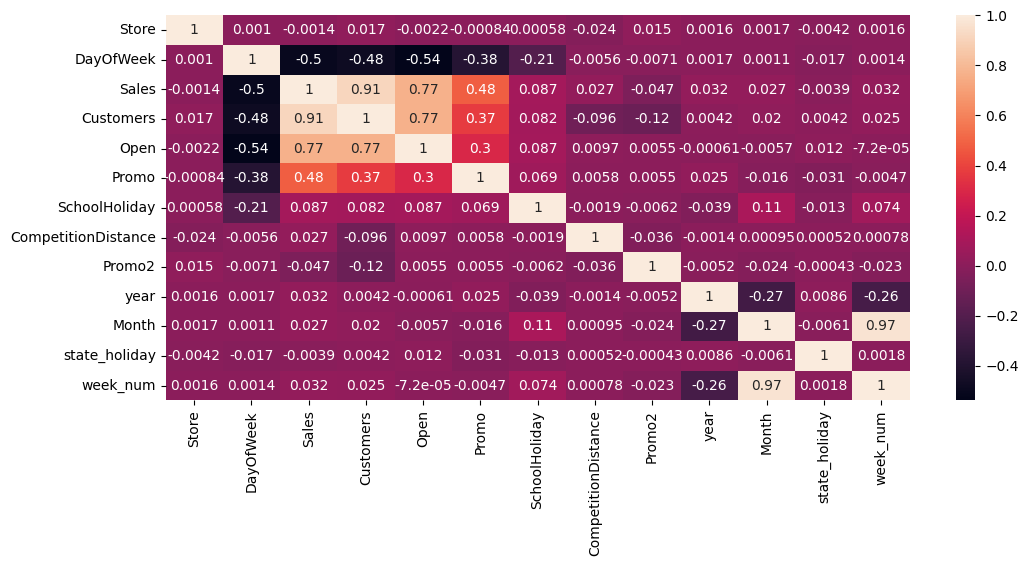

In [48]:
# making a dataframe with numerical dtypes only
numerical_df = df[["Store","DayOfWeek","Sales","Customers","Open","Promo","SchoolHoliday","CompetitionDistance","Promo2","year","Month","state_holiday","week_num"]]
# Correlation Heatmap visualization code
plt.figure(figsize=(12,5))
corr=numerical_df.corr()
sns.heatmap(corr,annot=True)

1. Why did you pick the specific chart?  
I have Picked the heatmap to find out the correlation of all features with each other

2. What is/are the insight(s) found from the chart?  
* It can be find out that Promo,Open and customer has positive correlation with Sales means that if the shop is runing any promo more customers will visit the store there will be more sales  
* Day of week is in negative correlation with sales that means as the week goes by the sales decreases and competiton distance also have some negative correlation.  
* State holiday has very low negative correlation with sales as sales is not affected by state holiday same case with the school holiday
Multicolinearity lies between promo,customers and open column

**Chart - 15: Pair Plot**

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

1. Why did you pick the specific chart?  
I have used pairplot on entire data to find out different visuals at once.

2. What is/are the insight(s) found from the chart?  
From the graph it can be seen what all are the features that are correlated and trends can be seen with every other variable and sales specifically.

# **5. Hypothesis Testing**

**Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.**  
* Null Hypothesis: There is no relationship between Sales and Customers

* Alternative Hypothesis: There is relationship between Sales and Customers

* Null Hypothesis: There is no relationship between Sales and Promo

* Alternative Hypothesis:There is relationship between Sales and Promo

* Null Hypothesis: There is no relationship between Sales and DayOfWeek

* Alternative Hypothesis: There is relationship between Sales and DayOfWeek

**Hypothetical Statement - 1**  
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.  
* Null Hypothesis: There is no relationship between Sales and Customers
* Alternative Hypothesis: There is relationship between Sales and Customers

2. Perform an appropriate statistical test.


In [51]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

sales = df['Sales']
customers = df['Customers']

correlation, p_value = pearsonr(sales, customers)

print("Pearson correlation coefficient:", correlation)
print(f"P-value: {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and Customers.")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and Customers.")


Pearson correlation coefficient: 0.9124953576449816
P-value: 0.0000
Reject the null hypothesis. There is a significant relationship between Sales and Customers.


**Which statistical test have you done to obtain P-Value?**  
In order to find out the relationship between two variables (Sales and Customers), I have used the Pearson correlation coefficient to test the hypothesis. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.

**Why did you choose the specific statistical test?**  
In order to find out the correlation coefficient and P vlaue between the two features, I am using Pearson method. It helps me to find out the correlationn coeficient value which ranges from -1 and 1. A Correlation value of 1 means perfect positive correlation, whereas correlation value of -1 means strong negative relationship and a correlation value of 0 means no relationship between the features. Also the P-value helps us to find out the statistical importance of the correlation. If the p-value is less than significance value which is generally taken as 0.05 indicates that the correlation is significant and provides us evidence to reject the null hypothesis.

**Hypothetical Statement - 2**
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.  
* Null Hypothesis: There is no relationship between Sales and Promo

* Alternative Hypothesis: There is relationship between Sales and Promo

2. Perform an appropriate statistical test.


In [52]:
# Perform Statistical Test to obtain P-Valuefrom scipy.stats import pearsonr

sales = df['Sales']
promo = df['Promo']

correlation, p_value = pearsonr(sales, promo)

print("Pearson correlation coefficient:", correlation)
print(f"P-value: {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and Promo.")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and Promo.")


Pearson correlation coefficient: 0.4809472646793368
P-value: 0.0000
Reject the null hypothesis. There is a significant relationship between Sales and Promo.


**Which statistical test have you done to obtain P-Value?**  
In order to find out the relationship between two variables (Sales and Promo), I have used the Pearson correlation coefficient to test the hypothesis. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.

**Why did you choose the specific statistical test?**  
In order to find out the correlation coefficient and P vlaue between the two features, I am using Pearson method. It helps me to find out the correlationn coeficient value which ranges from -1 and 1. A Correlation value of 1 means perfect positive correlation, whereas correlation value of -1 means strong negative relationship and a correlation value of 0 means no relationship between the features. Also the P-value helps us to find out the statistical importance of the correlation. If the p-value is less than significance value which is generally taken as 0.05 indicates that the correlation is significant and provides us evidence to reject the null hypothesis.

**Hypothetical Statement - 3**
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.  
* Null Hypothesis: There is no relationship between Sales and DayOfWeek

* Alternative Hypothesis: There is relationship between Sales and DayOfWeek

2. Perform an appropriate statistical test.


In [53]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

sales = df['Sales']
DayOfWeek= df['DayOfWeek']

correlation, p_value = pearsonr(sales, DayOfWeek)

print("Pearson correlation coefficient:", correlation)
print(f"P-value: {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and DayOfWeek .")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and DayOfWeek.")

Pearson correlation coefficient: -0.5049935829873136
P-value: 0.0000
Reject the null hypothesis. There is a significant relationship between Sales and DayOfWeek .


**Which statistical test have you done to obtain P-Value?**  
In order to find out the relationship between two variables (Sales and DayOfWeek), I have used the Pearson correlation coefficient to test the hypothesis. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.

**Why did you choose the specific statistical test?**  
In order to find out the correlation coefficient and P vlaue between the two features, I am using Pearson method. It helps me to find out the correlationn coeficient value which ranges from -1 and 1. A Correlation value of 1 means perfect positive correlation, whereas correlation value of -1 means strong negative relationship and a correlation value of 0 means no relationship between the features. Also the P-value helps us to find out the statistical importance of the correlation. If the p-value is less than significance value which is generally taken as 0.05 indicates that the correlation is significant and provides us evidence to reject the null hypothesis.

# **6. Feature Engineering & Data Pre-processing**

1. Handling Missing Values

In [54]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908510 entries, 0 to 908509
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                908510 non-null  int64  
 1   DayOfWeek            908510 non-null  int64  
 2   Sales                908510 non-null  int64  
 3   Customers            908510 non-null  int64  
 4   Open                 908510 non-null  int64  
 5   Promo                908510 non-null  int64  
 6   SchoolHoliday        908510 non-null  int64  
 7   StoreType            908510 non-null  object 
 8   Assortment           908510 non-null  object 
 9   CompetitionDistance  908510 non-null  float64
 10  Promo2               908510 non-null  int64  
 11  year                 908510 non-null  int32  
 12  Month                908510 non-null  int32  
 13  week_num             908510 non-null  UInt32 
 14  state_holiday        908510 non-null  int64  
dtypes: UInt32(1), flo

In [55]:
#let's change the datatype of CompetitionDistance to int
df['CompetitionDistance']=df['CompetitionDistance'].astype('int')

#let's change the datatype of week_num to int
df["week_num"] = df["week_num"].astype(int)

# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

,0
Store,0
DayOfWeek,0
Sales,0
Customers,0
Open,0
Promo,0
SchoolHoliday,0
StoreType,0
Assortment,0
CompetitionDistance,0


* The data frame is already cleaned. All the missing values has already filled during EDA Process



**2. Handling Outliers**  
**What all outlier treatment techniques have you used and why did you use those techniques?**  

Outliers can lead to biased insights and conclusions when analyzing data. So we should treat the outliers before passing the data into our model. In our dataset only in Sales,Customers and CompetitionDistnace outliers were present and I have already removed them during EDA process by consideing values around 95 percentile and removed all other values above it

**3. Categorical Encoding**  
StoreType,Assortment Column Contains Categorical Values So, I have to Encode them

In [56]:
#Encode the Categorical columns
#Encode StoreType,Assortment column using One Hot Encoding
encoded_df = pd.get_dummies(df, columns=['StoreType','Assortment'],dtype=int,drop_first=True)

In [57]:
#head of the data after categorical encoding
encoded_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,year,Month,week_num,state_holiday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,1,1270,0,2015,7,31,0,0,1,0,0,0
1,2,5,6064,625,1,1,1,570,1,2015,7,31,0,0,0,0,0,0
2,3,5,8314,821,1,1,1,14130,1,2015,7,31,0,0,0,0,0,0
3,6,5,5651,589,1,1,1,310,0,2015,7,31,0,0,0,0,0,0
4,8,5,8492,833,1,1,1,7520,0,2015,7,31,0,0,0,0,0,0


**What all categorical encoding techniques have you used & why did you use those techniques?**  
In Our dataframe StoreType,Assortment are Categorical Features,so inorder to encode these features i have used get_dummies Function from pandas for One Hot Encoding as it is straight forward and easy to use function provided by pandas to perform one hot encoding in just one line of code and also it retains the original column names and allows for easy interpretation and exploration of the encoded categorical variables

**4. Feature Manipulation & Selection**
1. Feature Manipulation

In [58]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908510 entries, 0 to 908509
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Store                908510 non-null  int64
 1   DayOfWeek            908510 non-null  int64
 2   Sales                908510 non-null  int64
 3   Customers            908510 non-null  int64
 4   Open                 908510 non-null  int64
 5   Promo                908510 non-null  int64
 6   SchoolHoliday        908510 non-null  int64
 7   CompetitionDistance  908510 non-null  int64
 8   Promo2               908510 non-null  int64
 9   year                 908510 non-null  int32
 10  Month                908510 non-null  int32
 11  week_num             908510 non-null  int64
 12  state_holiday        908510 non-null  int64
 13  StoreType_b          908510 non-null  int64
 14  StoreType_c          908510 non-null  int64
 15  StoreType_d          908510 non-null  int64
 16  As

In [59]:
# Manipulate Features to minimize feature correlation and create new features
#let's calculate the VIF to find Multicolinearity between the features
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=encoded_df[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'year', 'Month',
       'week_num', 'state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c']]

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

               Variable  VIF
0                 Store    4
1             DayOfWeek    8
2             Customers   11
3                  Open   16
4                 Promo    2
5         SchoolHoliday    1
6   CompetitionDistance    2
7                Promo2    2
8                  year   32
9                 Month   65
10             week_num   58
11        state_holiday    1
12          StoreType_b    2
13          StoreType_c    1
14          StoreType_d    2
15         Assortment_b    2
16         Assortment_c    2


Here Many of the features have very high Multicolinearity so we have to exclude some feature

* Month have very high correlation with week number i,e 0.97 and their respective correlation with sales is 0.027 and 0.032,so we will remove Week_no feature
* year feature is has also high VIF So we remove this also
* Customer and open also have high VIF value and also correlation with each other is 0.77 and with sales is 0.91 and 0.77 respectively so we will drop open column

In [60]:
# After Analysing all feature and Removing those features having high correlation
#calculating VIF again
X=encoded_df[['Store', 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month','year',
        'state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


               Variable  VIF
0                 Store    4
1             DayOfWeek    7
2             Customers    5
3                 Promo    2
4         SchoolHoliday    1
5   CompetitionDistance    2
6                Promo2    2
7                 Month    4
8                  year   27
9         state_holiday    1
10          StoreType_b    2
11          StoreType_c    1
12          StoreType_d    2
13         Assortment_b    2
14         Assortment_c    2


* Here VIF is now less than 5 for all features

2. Feature Selection

In [61]:
# Selecting only those features which are important
new_df=encoded_df[[ 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month','year',
        'state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c','Sales']]


In [62]:
new_df.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,year,state_holiday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Sales
0,5,555,1,1,1270,0,7,2015,0,0,1,0,0,0,5263
1,5,625,1,1,570,1,7,2015,0,0,0,0,0,0,6064
2,5,821,1,1,14130,1,7,2015,0,0,0,0,0,0,8314
3,5,589,1,1,310,0,7,2015,0,0,0,0,0,0,5651
4,5,833,1,1,7520,0,7,2015,0,0,0,0,0,0,8492


**What all feature selection methods have you used and why?**  
* I used heatmap to find out the correlation of all the features with each other and with sales also and it was find out that some of the features have very positive,negative and very minimum correlation with sales. Customers,open and sales have very high correlation with sales and dayofweek has low
* After that I calculated VIF value of all the features with each other and excluded those features which were having Multicolinearity.  

**Which all features you found important and why?**  
* Features like 'DayOfWeek', 'Customers', 'Promo','SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month','is_state_holiday', 'StoreType_b', 'StoreType_c','StoreType_d', 'Assortment_b', 'Assortment_c','Sales' are important feature.These are having VIF under 5 and correlation with sales and also each feature is important for predicting Sales.

**5. Data Transformation**

In [63]:
#let's create a dataframe where sales!=0
new_df1=new_df[new_df['Sales']!=0]

In [64]:
# Let's find out skewness of continous feature
new_df1[['Customers','CompetitionDistance','Sales']].skew()

,0
Customers,1
CompetitionDistance,2
Sales,0


* In customers,competitionsDistance there is positive skewness present,Now let's transform the data



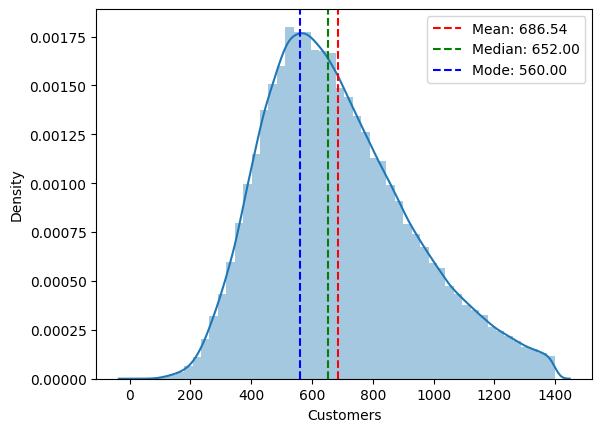

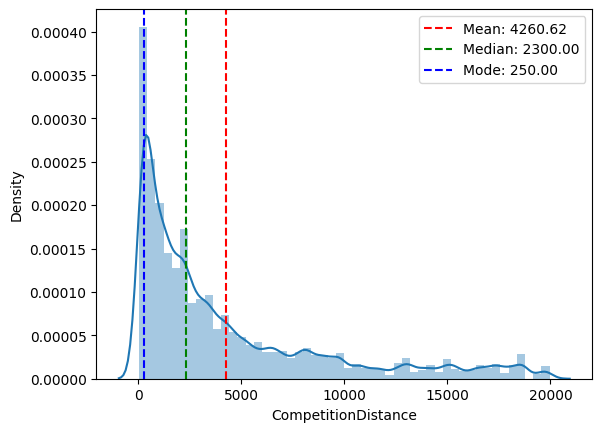

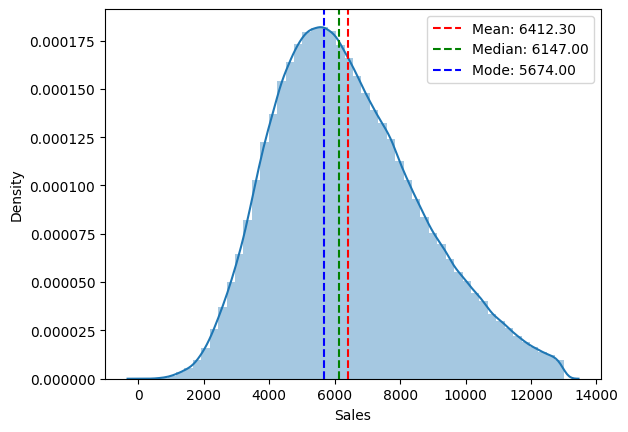

In [65]:
# Let's find out skewness of continous feature
columns=['Customers','CompetitionDistance','Sales']
for col in columns:
  sns.distplot(new_df1[col])
  plt.axvline(new_df1[col].mean(), color='red', linestyle='--', label=f'Mean: {new_df1[col].mean():.2f}')
  plt.axvline(new_df1[col].median(), color='green', linestyle='--', label=f'Median: {new_df1[col].median():.2f}')
  plt.axvline(new_df1[col].mode()[0], color='blue', linestyle='--', label=f'Mode: {new_df1[col].mode()[0]:.2f}')
  plt.legend()
  plt.show()

* Here we can see that each feature is rightly skewed,so let's apply log tranformation.



**log transformation**

In [66]:
# log transformation
new_df1['CompetitionDistance']=np.log(new_df1['CompetitionDistance'])
new_df1['Customers']=np.log(new_df1['Customers'])
new_df1['Sales']=np.log(new_df1['Sales'])

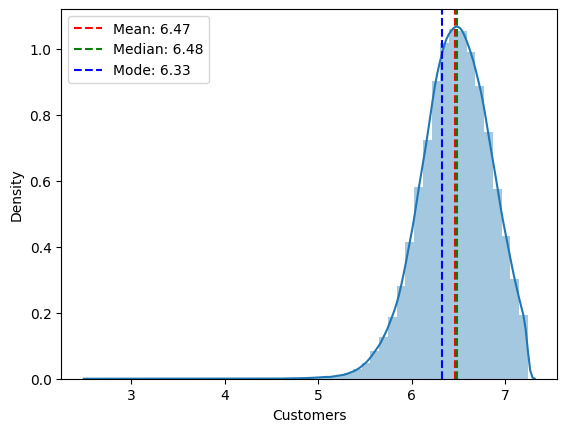

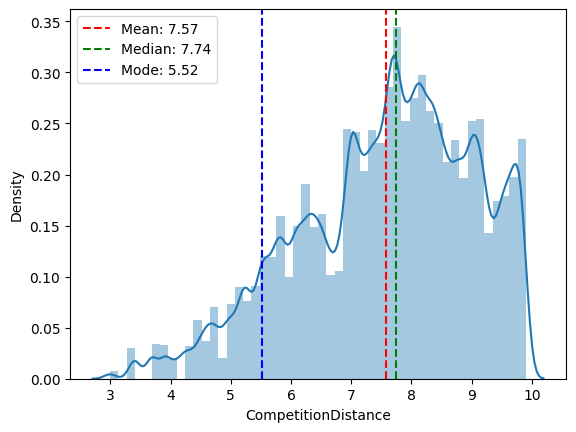

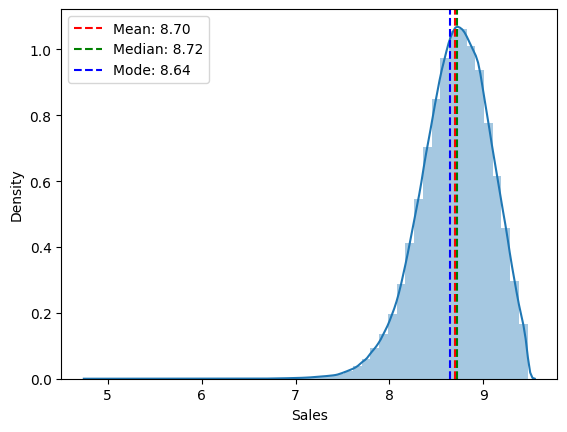

In [67]:
columns=['Customers','CompetitionDistance','Sales']
for col in columns:
  sns.distplot(new_df1[col])
  plt.axvline(new_df1[col].mean(), color='red', linestyle='--', label=f'Mean: {new_df1[col].mean():.2f}')
  plt.axvline(new_df1[col].median(), color='green', linestyle='--', label=f'Median: {new_df1[col].median():.2f}')
  plt.axvline(new_df1[col].mode()[0], color='blue', linestyle='--', label=f'Mode: {new_df1[col].mode()[0]:.2f}')
  plt.legend()
  plt.show()

**6. Data Splitting**

In [68]:
new_df1.columns

Index(['DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Month', 'year', 'state_holiday',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Sales'],
      dtype='object')

In [70]:
# Define train and test based on the specified condition
train_data = new_df1[(new_df1['year'] < 2015) | ((new_df1['year'] == 2015) & (new_df1['Month'] < 4))]
test_data = new_df1[(new_df1['year'] == 2015) & (new_df1['Month'] >= 4)]

# Separate independent and dependent variables for training and testing
X_train = train_data.drop(columns=['Sales'])
y_train = train_data[['Sales']]
X_test = test_data.drop(columns=['Sales'])
y_test = test_data[['Sales']]

**What data splitting ratio have you used and why?**  
As dataset is huge i have choosen 80-20 ratio. By allocating 80% of the data to the training set, we will get enough data to train the model and capture patterns and relationships in the data.

**7. Data Scaling**

In [71]:
from sklearn.preprocessing import StandardScaler
# Scaling the independent variables
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [75]:
# Check shapes
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((645692, 14), (98129, 14), (645692, 1), (98129, 1))

**Which method have you used to scale your data and why?**  
I have used StandardScaler from the scikit-learn library for scaling data. This method transforms the data such that it has a mean of 0 and a standard deviation of 1. It helps to bring all features onto a similar scale.When features have significantly different scales, it can lead to biased model training or result in features with larger scales dominating the learning process.

# **7. ML Model Implementation**

 ## **ML Model - Linear Regression**

In [76]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# Fit the Algorithm
lr.fit(x_train,y_train)
# Predict on the model
y_train_predict=lr.predict(x_train)
y_test_predict=lr.predict(x_test)

In [77]:
#coefficients
lr.coef_

array([[ 0.00081163,  0.33536921,  0.06918627,  0.00155328,  0.05950353,
         0.03507738,  0.0112986 ,  0.01337994, -0.00268084, -0.01333921,
        -0.01198407,  0.07936893, -0.03148907,  0.01473323]])

In [78]:
#intercept
lr.intercept_

array([8.69336019])

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**


In [79]:
#importing labraries to check the accuracy of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [80]:
#let's define a function of metrics
def cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred):
  #mean_squared_error metrics
  MSE_train=mean_squared_error(y_train,y_train_pred)
  print('MSE train score is :',MSE_train)
  MSE_test=mean_squared_error(y_test,y_test_pred)
  print('MSE test score is :',MSE_test)

  #Root mean square error
  print('RMSE train Score: ',np.sqrt(MSE_train))
  print('RMSE test Score: ',np.sqrt(MSE_test))

  #R2 score
  r2_train=r2_score(y_train,y_train_pred)
  print('r2 train score: ',r2_train)
  r2_test=r2_score(y_test,y_test_pred)
  print('r2 test score: ',r2_test)

In [81]:
# calculating metrics
cal_metrics_score(y_train,y_train_predict,y_test,y_test_predict)

MSE train score is : 0.022895599476813522
MSE test score is : 0.02243622533068148
RMSE train Score:  0.15131291906778324
RMSE test Score:  0.14978726691772395
r2 train score:  0.8365723959374762
r2 test score:  0.8274815870184515


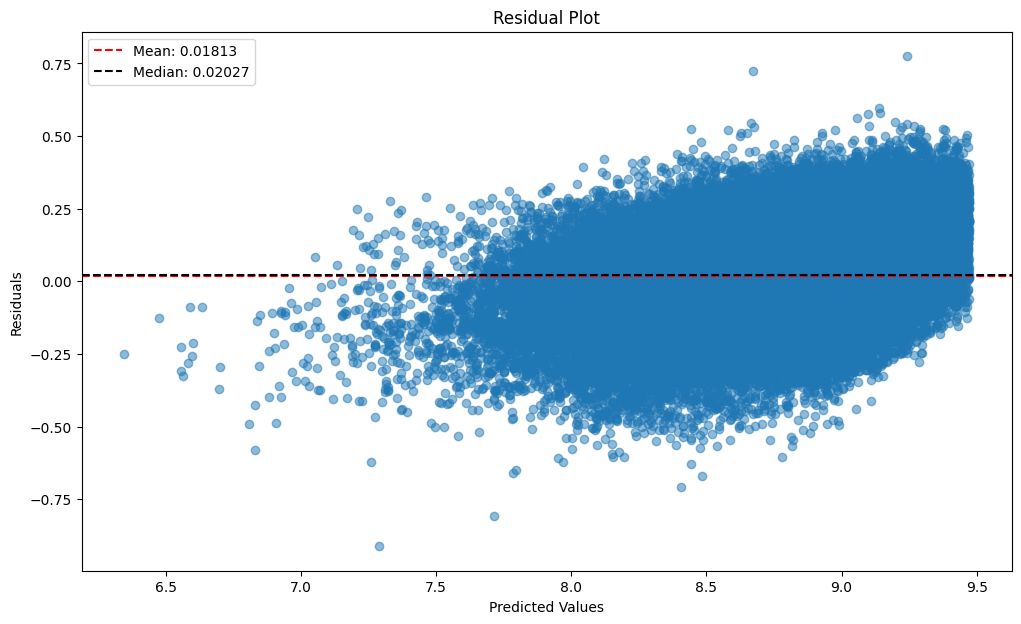

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape predictions to a column vector
y_test_dtt_pred = y_test_predict.reshape(-1, 1)

# Calculate residuals
residuals = y_test - y_test_dtt_pred

# Create the residual plot
plt.figure(figsize=(12, 7))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=f'Mean: {round(np.nanmean(residuals), 5)}')
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--', label=f'Median: {round(np.nanmedian(residuals), 5)}')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


linear regression model achieved a reasonably good R-squared score of 82%, indicating that it explains a significant portion of the variance in the target variable and has low MSE,RMSE on both trainig and test sample.The residual plot, which is a graphical representation of the differences between the actual values (y_test) and the predicted values (y_test_predict) was also plotted.It helps us to visualize the distribution of residuals.The residuals shows that residuls are scattered around mean or zero line that indicates the model prediction is unbiased.

since the r2 score is not that low let's go for cross validation and hyperparameter tunning

**2. Cross- Validation & Hyperparameter Tuning**

**Ridge Regression**

In [83]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV  etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.8333456847991281


In [84]:
# calculating metrics for Ridge
cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred)

MSE train score is : 0.022895599476817744
MSE test score is : 0.022436224949415655
RMSE train Score:  0.1513129190677972
RMSE test Score:  0.14978726564503292
r2 train score:  0.836572395937446
r2 test score:  0.8274815899501111


* Ridge Regression has shown same performance as of Linear Regression

**Lasso Regression**

In [85]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
lasso = Lasso()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_lasso_pred = grid_search.predict(x_train)
y_test_lasso_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.6039173015139756


In [86]:
#calculating metrics for Lasso Regressions
cal_metrics_score(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

MSE train score is : 0.05491915467069145
MSE test score is : 0.0553794915886371
RMSE train Score:  0.23434836178367335
RMSE test Score:  0.235328475940837
r2 train score:  0.6079899164003283
r2 test score:  0.5741715970586354


**Which hyperparameter optimization technique have you used and why?**  
I have used GridSearchCV technique for hyperparameter tuning . It systematically searches through a predefined set of hyperparameters and evaluates the model's performance for each combination using cross-validation

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**  
I tried multiple regularization techniques, including Lasso, Ridge, with Gridsearch cv as a hyperparameter. However, i observed that the R-squared score remains the same or lower despite these attempts.Now let's try some complex Models

## **ML Model - Decision Tree**

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [87]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=20)

# Fit the Algorithm
dt.fit(x_train,y_train)

# Predict on the model
y_train_dt_pred=dt.predict(x_train)
y_test_dt_pred=dt.predict(x_test)

In [88]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_dt_pred,y_test,y_test_dt_pred)

MSE train score is : 0.0030304820178943975
MSE test score is : 0.00974137755366724
RMSE train Score:  0.0550498139678455
RMSE test Score:  0.09869841717913838
r2 train score:  0.9783685762043226
r2 test score:  0.9250958228916261


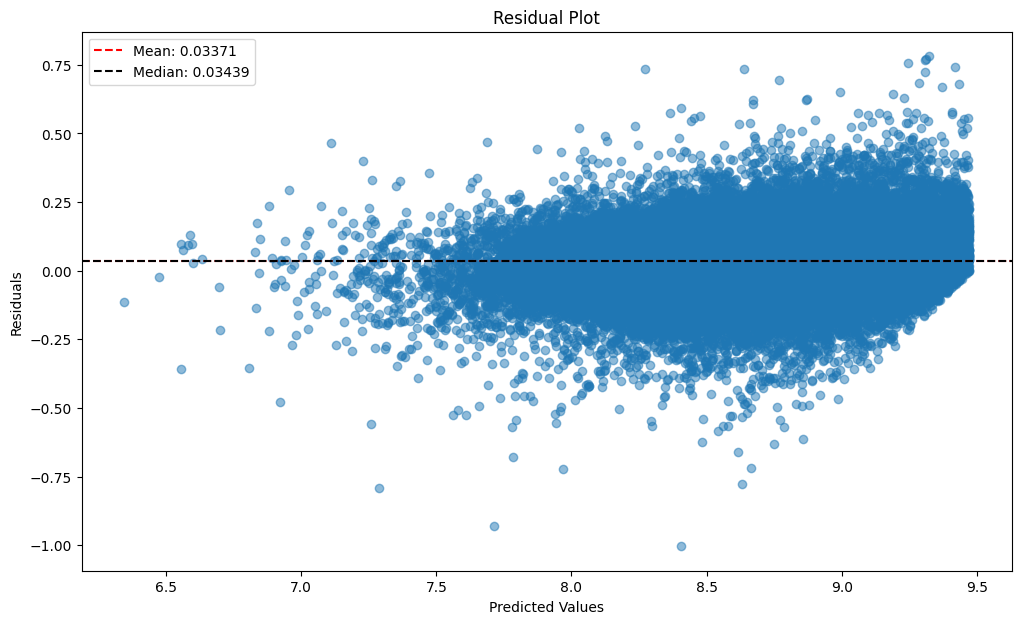

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape predictions to a column vector
y_test_dtt_pred = y_test_dt_pred.reshape(-1, 1)

# Calculate residuals
residuals = y_test - y_test_dtt_pred

# Create the residual plot
plt.figure(figsize=(12, 7))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=f'Mean: {round(np.nanmean(residuals), 5)}')
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--', label=f'Median: {round(np.nanmedian(residuals), 5)}')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

* The decision tree model with max_depth of 20 has achieved high performance on both the training and test data with high R2 score of 97.80% on the training data and 92.5% on the test data.The Model has achieved a relatively low MSE and RMSE value respectively which predicts average magnitude errors made by the decision tree model.The residuals plot shows that residuls are scattered around mean or zero line that indicates the model prediction is unbiased.

* Overall, the decision tree model demonstrates strong predictive performance, with high R2 scores, accurate predictions indicated by mean and median residuals, and relatively low MSE and RMSE scores.

* Let's now apply hyperparameter tunning to find best parameters for the model for best performace.

**2. Cross- Validation & Hyperparameter Tuning**

In [91]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV.)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm
dt=DecisionTreeRegressor()
param_grid={'max_depth': [17,18,19,20], 'min_samples_leaf': [5,6,7,8], 'min_samples_split': [2,3,4,5]}
gridsearch=GridSearchCV(dt,param_grid,scoring='r2', cv=3)
gridsearch.fit(x_train,y_train)

# Predict on the model
y_train_dtgs_pred=gridsearch.predict(x_train)
y_test_dtgs_pred=gridsearch.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',gridsearch.best_params_)
best_score = print('best score:',gridsearch.best_score_)

KeyboardInterrupt: 

In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_dtgs_pred,y_test,y_test_dtgs_pred)

* Model took too much time to execute. So forcdfully stoped the code.

**Which hyperparameter optimization technique have you used and why?**  
I have used Random Search cv hyperparameter to tune my model.It is more efficient than GridSearchCV when searching through a large hyperparameter space because it does not evaluate all possible combinations.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**  
After applying Random Search cv as a hyperparamter tunning it was found that the best parametes are n_estimator=100 and max_depth=20.The model gave out almost same MSE,RMSE and R2 score

## **ML Model - Random Forest**

In [ ]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=20)

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_train_rf_pred=rf.predict(x_train)
y_test_rf_pred=rf.predict(x_test)

In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_rf_pred,y_test,y_test_rf_pred)

* Model took too much time to execute. So forcdfully stoped the code.

## **Ml Model - XGBOOST**

In [93]:
#import the algorithm
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100,learning_rate=0.1, max_depth=13)
#fit the algorithm
xgb.fit(x_train,y_train)
# Predict on the mode
y_train_xgb_pred=xgb.predict(x_train)
y_test_xgb_pred=xgb.predict(x_test)


In [101]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_xgb_pred,y_test,y_test_xgb_pred)

MSE train score is : 0.0038435605820268393
MSE test score is : 0.006634945515543222
RMSE train Score:  0.061996456205389995
RMSE test Score:  0.08145517488498336
r2 train score:  0.9725648760795593
r2 test score:  0.9489820599555969


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

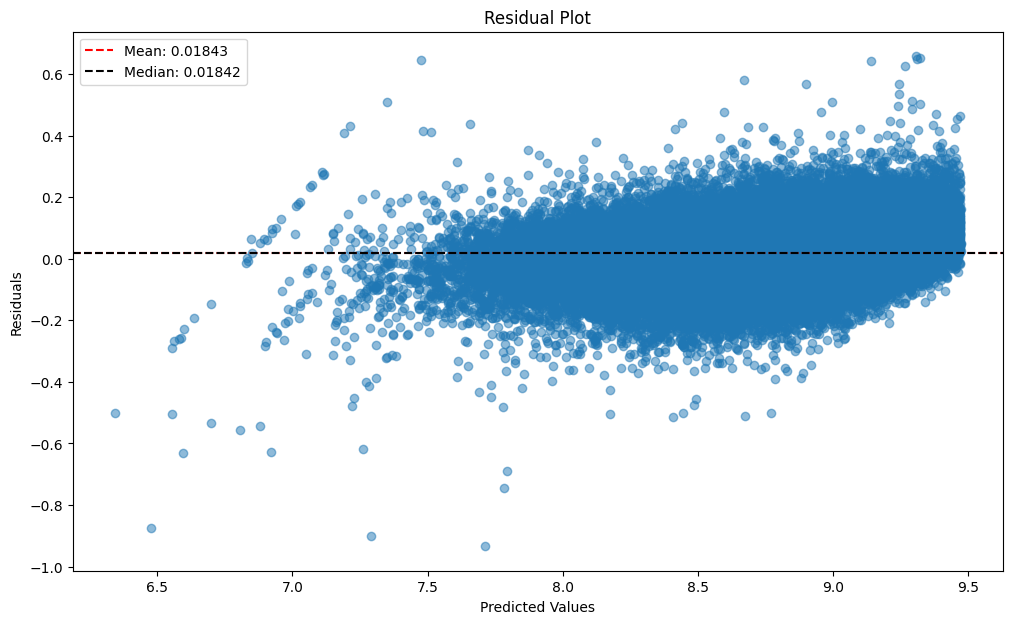

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape predictions to a column vector
y_test_dtt_pred = y_test_xgb_pred.reshape(-1, 1)

# Calculate residuals
residuals = y_test - y_test_dtt_pred

# Create the residual plot
plt.figure(figsize=(12, 7))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=f'Mean: {round(np.nanmean(residuals), 5)}')
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--', label=f'Median: {round(np.nanmedian(residuals), 5)}')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


* The Model has shown R2 score of 97.25 on training and 94.89 on test, indicating that the model explains approximately 95% of the variability in the target variable. The scatter plot also shows residual mean of 0.01843 and residual vlaue of 0.01842.  

* In summary, the XGBoost model with 100 estimators, a learning rate of 0.1, and a maximum depth of 13 demonstrates good performance, with relatively low MSE and RMSE scores and high R2 scores on both the training and test data.


**1. Which Evaluation metrics did you consider for a positive business impact and why?**  
* consider several key metrics that assess the performance of machine learning models.

* One essential metric is the R2 score, which is also known as the coefficient of determination. It helps us to measure how much of the target variable's variance the model can explain.A higher R2 score indicates a stronger relationship between the features and the target variable which is very important for accurate prediction of the result.

* Another important metric is the Mean Squared Error (MSE), which measures the average squared difference between the predicted and actual values. A lower MSE suggests smaller prediction errors and higher accuracy in the model's predictions. Minimizing prediction errors is critical for businesses as it helps us to improves the reliability of decision-making.

* The next metric is Root Mean Squared Error (RMSE) it also provides an average measure of the prediction errors in the original unit of the target variable. Similar to MSE, a lower RMSE indicates better prediction accuracy.

* Also analyzing the residuals, that is the differences between the predicted and actual values, can also provide us valuable insights. A well-behaved residual plot with a mean close to zero and no discernible patterns suggests that the model effectively captures the underlying patterns.

* Considering these evaluation metrics allows businesses to assess the model's performance, accuracy, and reliability.

**2. Which ML model did you choose from the above created models as your final prediction model and why?**  
* Based on the performance of all the models, i have selected XGBoost model as the final prediction model. The XGBoost model with learning rate of 0.1 and max_depth of 14 and 100 estimators, outperformed the other models in several key aspects, making it the preferred choice for prediction.

* First of all the XGBoost model achieved high r2 score of around 97% on the training data and r2 score of around 95% in test dataset

* Also the XGBoost model achieved lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values compared to the other models.The XGBoost model exhibits smaller prediction errors and improved accuracy in predicting the target variable.

* As the XGBoost model displayed consistent performance across various evaluation metrics, including the R2 score, MSE, and RMSE. Its high performance on both the training and test data indicates good capabilities and reduces the risk of overfitting.

* Additionally the residuals analysis revealed mean and median values of 0.01843 and 0.01842, respectively.The well-behaved residuals indicate that the XGBoost model effectively captures the underlying patterns in the data and minimizes systematic errors.

* Considering the model's strong predictive performance, lower prediction errors, and consistency across evaluation metrics, the XGBoost model is the preferred choice as the final prediction model.

**3. Explain the model which you have used and the feature importance using any model explainability tool?**  
The Model can be explained in two ways:

1.  Globally :
This is the overall explanation of model behavior. It shows us a big picture view of the model, and how features in the data collectively affect the result. e.g Feature importance

2.  Locally :
This tells us about each instance and feature in the data individually (kind of like explaining observations seen at certain points in the model), and how features individually affect the result.

In [98]:
# Plotting the barplot to find out which feature is contributing the most
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100,learning_rate=0.1, max_depth=14)

# Train your XGBoost model
model.fit(x_train,y_train)

# Get the feature importance scores
importance = model.feature_importances_

indices = np.argsort(importance)


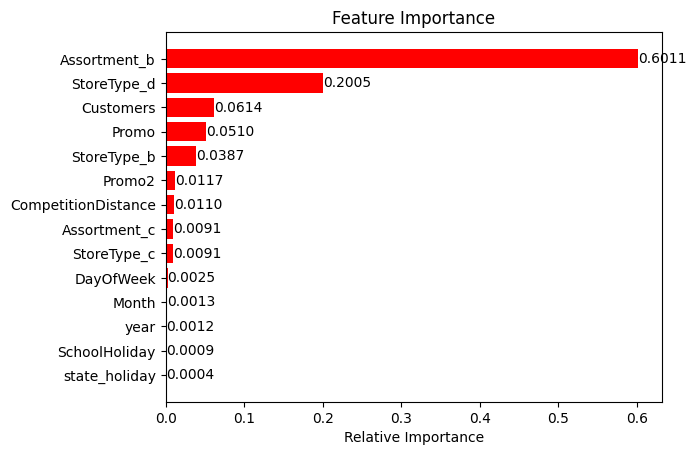

In [99]:
features=new_df.columns
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='red', align='center')

# Add numeric values on top of the bars
for i, v in enumerate(importance[indices]):
    plt.text(v, i, f'{v:.4f}', color='black', va='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

* I have applied Feature importance method to find out what are the features that are important for the prediction of the target feature:

* It was found that Assortment b is contributing the most around 60.11, followed by the store_type_d and then by promo, customers and so on..

# **Conculusion**

## **EDA**
EDA helps us to extract some useful insights from the data.some of the insights drawn from the data are as:

* It has been find out that Day-1 i,e Monday has got maximum Sales and Day-7 i,e Sunday has got least
* when any kind of Promo was applied ,during that period sales got almost doubles
* After october there was a very large growth in sales that might be due to festival season.December shows maximum sales may be because of christmas and new year
* It was find out that Store b sales has been inceased from 2013 to 2015 and in 2013 store d has maximum sales and in remaining years store b has maximum sales
Sales are highest for the assortment b.
* School Holiday doesn't really affected sales but there little more sales during school Holiday Period
* Whether state holiday or not there was good amount of sales on both the occassions and it was find out that only 3% of sales is effected by stateholiday.So overall sales doesn't depend on stateholiday *The customers and sales are positively correlated to each other i,e more customer visits the store more will be sales
* Promo,Open and customer has positive correlation with Sales means that if the shop is running any promo more customers will visit the store there will be more sales
* State holiday has very low negative correlation with sales as sales is not affected by state holiday same case with the school holiday

## **ML Model**
* I have implemented Linear Regression,Ridge Regression,Lasso Regression,Decision Tree,Random Forest and XGBoost model on my data. Based on the performance of all the models, i have selected XGBoost model as the final prediction model. The XGBoost model outperformed the other models in several key aspects, making it the preferred choice for prediction.

* The XGBoost model with learning rate of 0.1 and max_depth of 14 and 100 estimators, outperformed the other models in several key aspects, making it the preferred choice for prediction.

* First of all the XGBoost model achieved high r2 score of around 97.5% on the training data and r2 score of around 96% in test dataset
* Also the XGBoost model achieved lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values compared to the other models. The XGBoost model exhibits smaller prediction errors and improved accuracy in predicting the target variable.

* As the XGBoost model displayed consistent performance across various evaluation metrics, including the R2 score, MSE, and RMSE. Its high performance on both the training and test data indicates good capabilities and reduces the risk of overfitting.

* Additionally the residuals analysis revealed mean and median values of 0.01843 and 0.01842 respectively.The well-behaved residuals indicate that the XGBoost model effectively captures the underlying patterns in the data and minimizes systematic errors.

* Considering the model's strong predictive performance, lower prediction errors, and consistency across evaluation metrics, the **XGBoost** model is the preferred choice as the final prediction model.